In [1]:
import numpy as np
from icl.util_classes.arg_classes import AttrArgs, AttrArgs_unbalanced
import matplotlib.pyplot as plt
import os

def plot_ndarray(data, args):
    names = [r'$S_{wp}$', r'$S_{pq}$', r'$S_{ww}$']
    type_num = len(data)
    
    
    fig, ax = plt.subplots()
    
    for i in range(type_num):
        ax.plot(data[i], label=names[i]) 
        
    ax.legend()
    ax.set_ylabel('S')
    ax.set_xlabel('Layer')
    
    # TODO
    # fig.savefig(f'attn_attr_{args.task_name}_{args.demonstration_shot}.pdf')
    save_folder = './analysis_results/attr/'
    os.makedirs(save_folder, exist_ok=True)
    file_name = f'attn_attr_{args.task_name}_{args.demonstration_shot}'
    file_name += f'_{"_".join([str(shot) for shot in args.demonstration_shots])}'
    file_name += '.pdf'
    fig.savefig(os.path.join(save_folder, file_name))
    plt.show()


In [2]:
task = 'trec'
demonstration_shot = 1
demonstration_shots = [1, 4, 1, 1, 1, 1]
proportions_list = []
for seed in [42]:
    # TODO:
    # ana_args = AttrArgs(task_name=task,sample_size=1000,seeds=[seed],demonstration_shot=demonstration_shot)
    ana_args = AttrArgs_unbalanced(task_name=task,sample_size=1000,seeds=[seed],demonstration_shot=demonstration_shot, demonstration_shots=demonstration_shots)
    print(ana_args.demonstration_shots)
    results = ana_args.load_result()
    print(results.shape)
    proportions = results.mean(axis=0)
    print([results.min(), results.max()])
    proportions = proportions / proportions.sum(axis=0,keepdims=True)
    proportions_list.append(proportions[np.newaxis,...])
proportions = np.concatenate(proportions_list,axis=0)
proportions = proportions.mean(0)

import pickle
# TODO
# with open(f'attn_attr_{task}_{demonstration_shot}.pkl', 'wb') as f:
save_folder = './analysis_results/attr/'
os.makedirs(save_folder, exist_ok=True)
file_name = f'attn_attr_{task}_{demonstration_shot}'
file_name += f'_{"_".join([str(shot) for shot in ana_args.demonstration_shots])}'
file_name += '.pkl'
with open(os.path.join(save_folder, file_name), 'wb') as f:
    pickle.dump(proportions, f)

[1, 4, 1, 1, 1, 1]
(500, 3, 48)
[0.0, 0.17881944444444445]


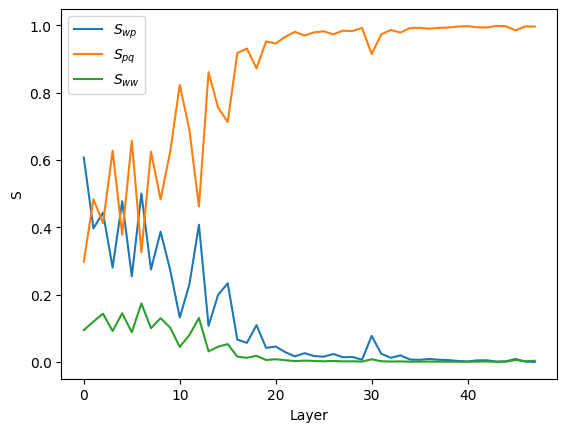

In [3]:
plot_ndarray(proportions,ana_args)